In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [3]:
df=pd.read_csv("wine_quality.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: xlabel='quality', ylabel='fixed acidity'>

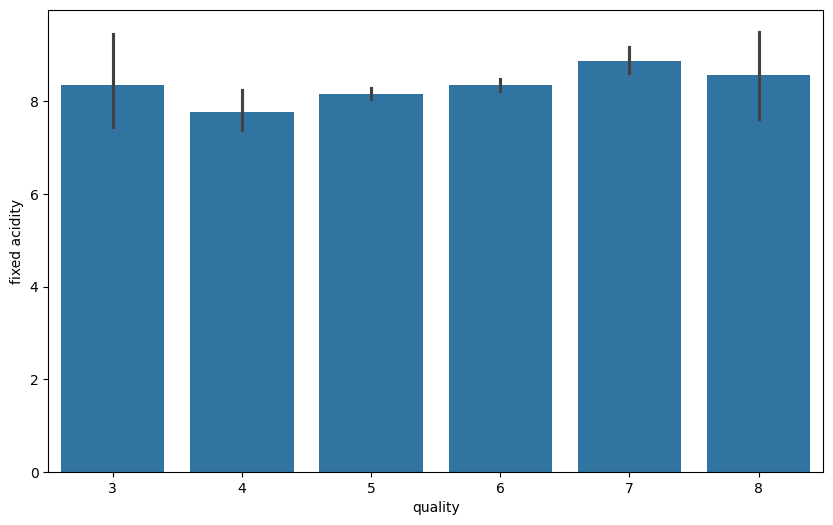

In [6]:
##fixed acidity vs quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='fixed acidity',data=df)

<Axes: xlabel='quality', ylabel='volatile acidity'>

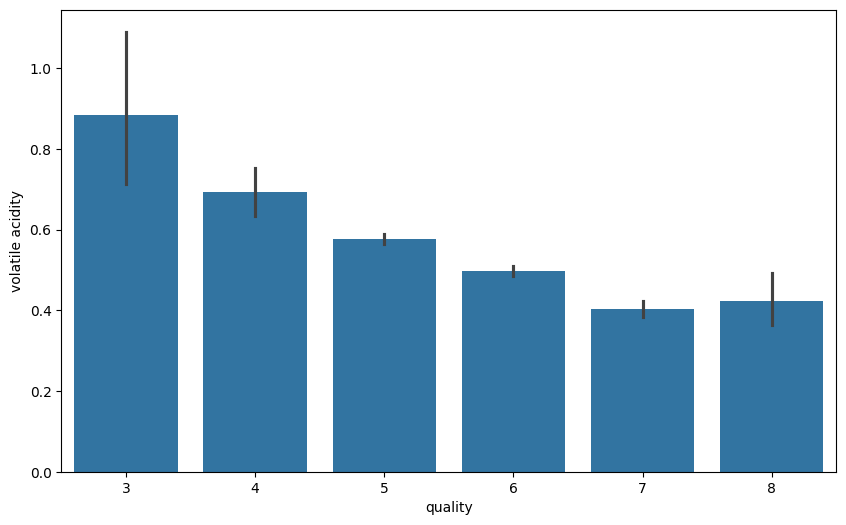

In [7]:
##volatile acidity vs quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='volatile acidity',data=df)

<Axes: xlabel='quality', ylabel='citric acid'>

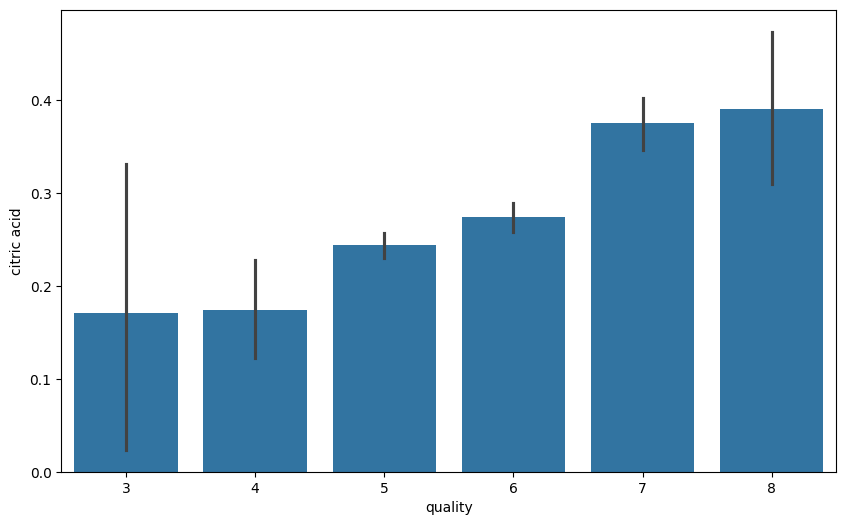

In [8]:
##citric acidity vs quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='citric acid',data=df)

<Axes: xlabel='quality', ylabel='sulphates'>

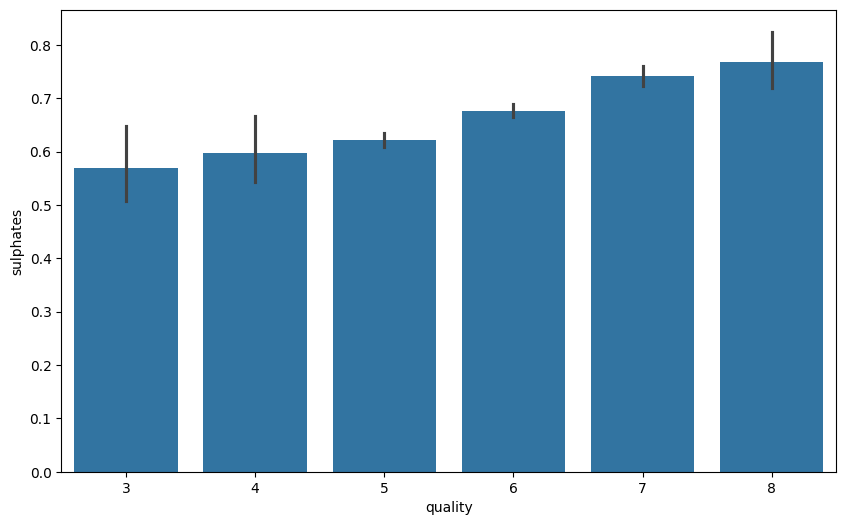

In [9]:
##sulphates vs quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='sulphates',data=df)

<Axes: xlabel='quality', ylabel='alcohol'>

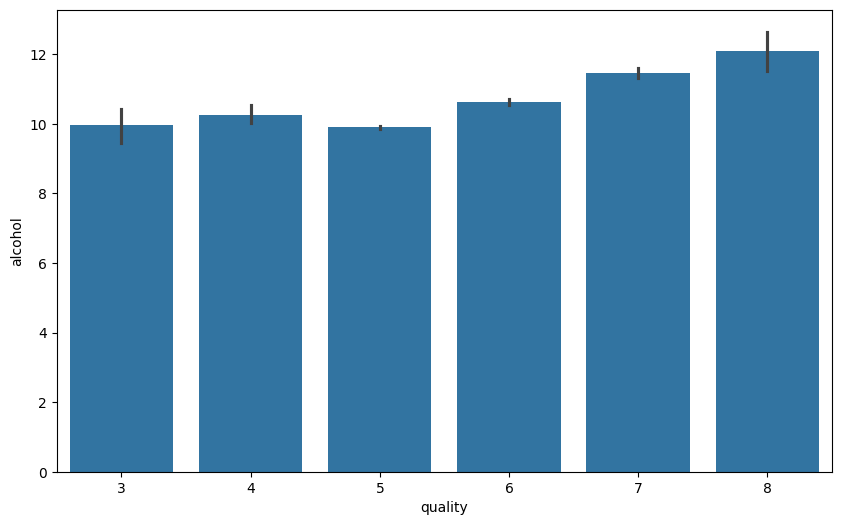

In [10]:
##alcohol vs quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='alcohol',data=df)

<Axes: xlabel='quality', ylabel='pH'>

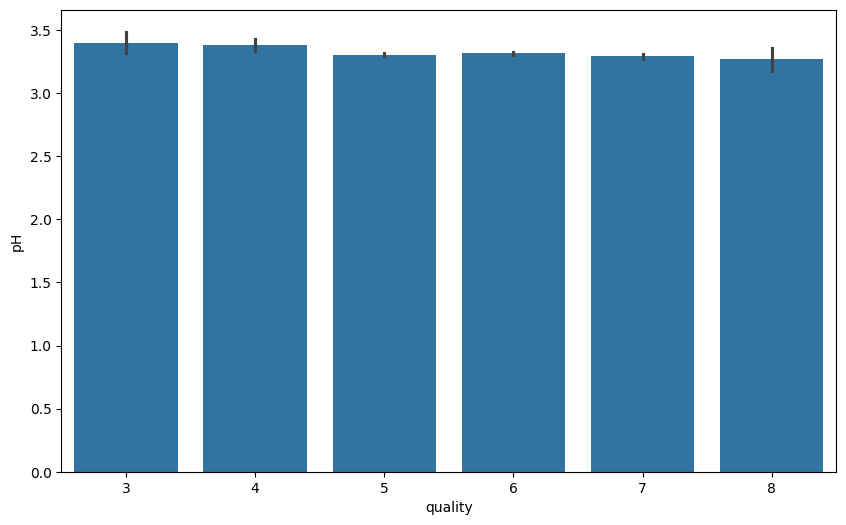

In [11]:
##PH vs quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='pH',data=df)

In [12]:
##Preprocessing data
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [13]:
##  classification : 1 good if quality of wine is in range(7,8)
## 0 if quality of wine is in range(3,6)

df['quality']=df['quality'].apply(lambda x:1 if x>6.5 else 0)

In [14]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [15]:
print(df['quality'].value_counts())

quality
0    1382
1     217
Name: count, dtype: int64


<Axes: ylabel='count'>

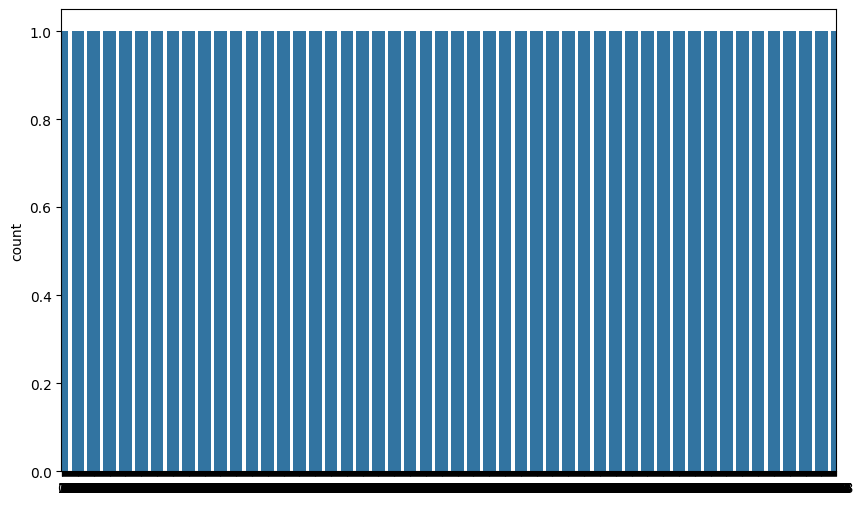

In [16]:
fig=plt.figure(figsize=(10,6))
sns.countplot(df['quality'])

In [17]:
##Now seprate dependent and independent variable
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.30, random_state=42)

In [19]:
X_train

array([[ 8.6 ,  0.22,  0.36, ...,  3.47,  0.87, 11.  ],
       [12.5 ,  0.46,  0.63, ...,  2.99,  0.87, 10.2 ],
       [ 7.2 ,  0.54,  0.27, ...,  3.39,  0.71, 11.  ],
       ...,
       [ 7.2 ,  0.62,  0.06, ...,  3.51,  0.54,  9.5 ],
       [ 7.9 ,  0.2 ,  0.35, ...,  3.32,  0.8 , 11.9 ],
       [ 5.8 ,  0.29,  0.26, ...,  3.39,  0.54, 13.5 ]])

In [20]:
##standardizing dataset
scaler=StandardScaler()

In [21]:
X_train=scaler.fit_transform(X_train)

In [22]:
X_test=scaler.fit_transform(X_test)

In [24]:
svc_regressor=SVC()

In [25]:
##fitting train data
svc_regressor.fit(X_train,y_train)

SVC()

In [26]:
y_pred=svc_regressor.predict(X_test)

In [27]:
cm=confusion_matrix(y_test,y_pred)

In [28]:
print(cm)

[[404   9]
 [ 48  19]]


<Figure size 1000x600 with 0 Axes>

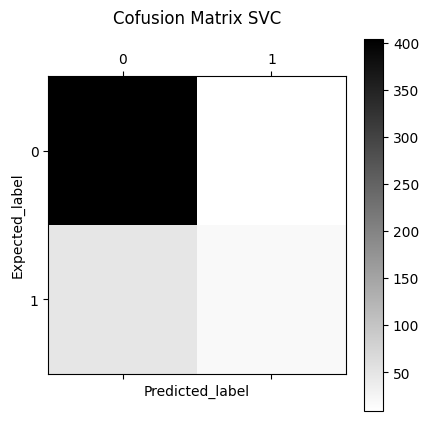

In [29]:
fig=plt.figure(figsize=(10,6))
plt.matshow(cm,cmap=plt.cm.binary,interpolation='nearest')
plt.title('Cofusion Matrix SVC\n')
plt.colorbar()
plt.ylabel('Expected_label')
plt.xlabel('Predicted_label')
plt.show()

In [30]:
print("accuracy:",sum(y_pred == y_test)*100 / len(y_pred),"%")

accuracy: 88.125 %


In [31]:
##Hypertunning

param={
    'C':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear','rbf'],
    'gamma':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

In [32]:
grid_svc=GridSearchCV(svc_regressor,param_grid=param,scoring='accuracy',cv=10)

In [33]:
grid_svc.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [34]:
print("Best param for svc",grid_svc.best_params_)

Best param for svc {'C': 1.4, 'gamma': 0.9, 'kernel': 'rbf'}


In [35]:
svc_regressor2=SVC(C=1.4,gamma=0.9,kernel='rbf')
svc_regressor2.fit(X_train,y_train)

SVC(C=1.4, gamma=0.9)

In [36]:
y_pred_svc=svc_regressor2.predict(X_test)

In [37]:
y_pred_svc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [38]:
cm_svc2=confusion_matrix(y_test,y_pred_svc)
print('confusion matrix: \n',cm_svc2)

confusion matrix: 
 [[404   9]
 [ 38  29]]


<Figure size 1000x600 with 0 Axes>

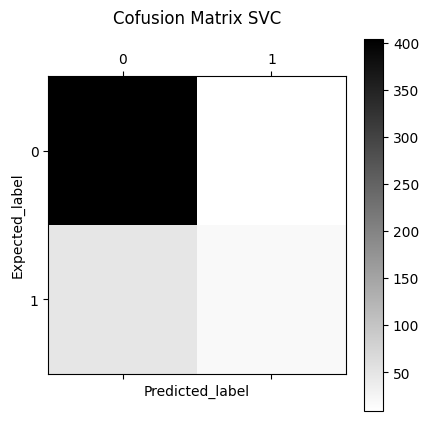

In [39]:
fig=plt.figure(figsize=(10,6))
plt.matshow(cm,cmap=plt.cm.binary,interpolation='nearest')
plt.title('Cofusion Matrix SVC\n')
plt.colorbar()
plt.ylabel('Expected_label')
plt.xlabel('Predicted_label')
plt.show()

In [40]:
print("accuracy:",sum(y_pred_svc == y_test)*100 / len(y_pred_svc),"%")

accuracy: 90.20833333333333 %
